 ------------------------**Data Loading**-------------------------







In [ ]:
import pandas as pd

In [ ]:
import numpy as np
%matplotlib inline


In [ ]:
from google.colab import files
upload = files.upload()

Saving spotify2023.csv to spotify2023.csv


In [ ]:
data = pd.read_csv('spotify2023.csv',  sep = ",", encoding='latin')

**------------------Analyzing Data to find missing and Null values--------------------**

In [ ]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
df= pd.DataFrame(data)

**Streams is object datatype not int, i.e there might be some invalid values in streams**

In [ ]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [ ]:
for r, v in enumerate(df['streams']):
    try:
        int(v)
    except:
        print('Incorrect value')
        print(f'row: {r}')
        print(f'value: {v}')

Incorrect value
row: 574
value: BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3


In [ ]:
df = df.drop(574)

In [ ]:
df['streams'] = df['streams'].astype('int64')


**Streams is now converted to int64**

In [ ]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

**-----Missing Values------**

In [ ]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Replacing Nan values with mean**

In [ ]:
# Convert the 'in_shazam_charts' column to numeric, coercing errors to NaN
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

# Fill NaN values with a default value (for example, 0)
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

# Convert the 'in_shazam_charts' column to integers
df['in_shazam_charts'] = df['in_shazam_charts'].astype(int)



In [ ]:
df['in_shazam_charts'].mean()

48.16596638655462

In [ ]:
# Calculate the mean of non-zero values in the column
mean_value = df.loc[df['in_shazam_charts'] != 0, 'in_shazam_charts'].mean()

# Replace 0 values with the calculated mean
df['in_shazam_charts'] = df['in_shazam_charts'].replace(0, mean_value)



In [ ]:
df['in_shazam_charts'].head(15)

0     826.000000
1     382.000000
2     949.000000
3     548.000000
4     425.000000
5     946.000000
6     418.000000
7     194.000000
8     953.000000
9     339.000000
10    251.000000
11    168.000000
12     83.068841
13     83.068841
14     83.068841
Name: in_shazam_charts, dtype: float64

In [ ]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
df['key'].head(15)

0       B
1      C#
2       F
3       A
4       A
5      C#
6       F
7       F
8      C#
9       D
10     F#
11      F
12    NaN
13      D
14     F#
Name: key, dtype: object

**Mapping "Key" column to new column "key_encoded"**

In [ ]:
# Create a mapping dictionary
mapping_dict = {key: idx for idx, key in enumerate(df['key'].unique())}

# Replace values in the 'key' column with integers using the mapping dictionary
df['key_encoded'] = df['key'].map(mapping_dict)

# Display the updated DataFrame
print(df.head(15))


                             track_name              artist(s)_name  \
0   Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                  LALA                 Myke Towers   
2                               vampire              Olivia Rodrigo   
3                          Cruel Summer                Taylor Swift   
4                        WHERE SHE GOES                   Bad Bunny   
5                              Sprinter           Dave, Central Cee   
6                       Ella Baila Sola  Eslabon Armado, Peso Pluma   
7                              Columbia                     Quevedo   
8                              fukumean                       Gunna   
9                       La Bebe - Remix       Peso Pluma, Yng Lvcas   
10                            un x100to   Bad Bunny, Grupo Frontera   
11                            Super Shy                    NewJeans   
12                              Flowers                 Miley Cyrus   
13    

In [ ]:
# Assuming df is your DataFrame
df['key_encoded'].fillna(-1, inplace=True)


In [ ]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
key_encoded              0
dtype: int64

In [ ]:
df['mode'].replace({'Major': -1, 'Minor': 1}, inplace=True)


**------Min max scaling--------**

In [ ]:
def min_max_scale(series):
  min_val =series.min()
  max_val = series.max()
  return (series - min_val)/(max_val - min_val)

In [ ]:
test = df.copy()
numerical_columns = df.select_dtypes(include=['int64','float64']).columns
test[numerical_columns]= df[numerical_columns].apply(min_max_scale)

print(test.dtypes)

track_name               object
artist(s)_name           object
artist_count            float64
released_year           float64
released_month          float64
released_day            float64
in_spotify_playlists    float64
in_spotify_charts       float64
streams                 float64
in_apple_playlists      float64
in_apple_charts         float64
in_deezer_playlists      object
in_deezer_charts        float64
in_shazam_charts        float64
bpm                     float64
key                      object
mode                     object
danceability_%          float64
valence_%               float64
energy_%                float64
acousticness_%          float64
instrumentalness_%      float64
liveness_%              float64
speechiness_%           float64
key_encoded             float64
dtype: object


**----Dropping the columns that are not required in our model ----**

In [ ]:
df.drop('track_name',axis=1,inplace=True)

In [ ]:
df.drop('artist(s)_name',axis=1, inplace=True)

In [ ]:
df.drop('in_deezer_playlists',axis=1, inplace=True)

In [ ]:
df.drop('key',axis=1,inplace=True)

In [ ]:
df.drop('in_shazam_charts',axis=1,inplace=True)

In [ ]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          952 non-null    int64
 1   released_year         952 non-null    int64
 2   released_month        952 non-null    int64
 3   released_day          952 non-null    int64
 4   in_spotify_playlists  952 non-null    int64
 5   in_spotify_charts     952 non-null    int64
 6   streams               952 non-null    int64
 7   in_apple_playlists    952 non-null    int64
 8   in_apple_charts       952 non-null    int64
 9   in_deezer_charts      952 non-null    int64
 10  bpm                   952 non-null    int64
 11  mode                  952 non-null    int64
 12  danceability_%        952 non-null    int64
 13  valence_%             952 non-null    int64
 14  energy_%              952 non-null    int64
 15  acousticness_%        952 non-null    int64
 16  instrume

**---------Splitting data into testing and training----------**

In [ ]:
datagen = np.random.rand(len(df)) <0.81
train_data = df[datagen]
test_data = df[~datagen]


In [ ]:
X_train = train_data.drop('streams',axis=1).values
y_train = train_data['streams'].values
X_test = test_data.drop('streams',axis =1).values
y_test = test_data['streams'].values

**-------Normalization ---------**

In [ ]:
def normalize(data):
    mu = []  # List to store means of each feature
    std = []  # List to store standard deviations of each feature

    for i in range(data.shape[1]):  # Iterate over each feature column
        mu_i = np.mean(data[:, i])  # Compute mean of the feature
        std_i = np.std(data[:, i])   # Compute standard deviation of the feature

        # Normalize the feature column
        data[:, i] = (data[:, i] - mu_i) / std_i

        # Append mean and standard deviation to respective lists
        mu.append(mu_i)
        std.append(std_i)

    return data, mu, std

# Normalize X_train
X_train, mu_X_train, std_X_train = normalize(X_train)

# Normalize y_train
y_train, mu_y_train, std_y_train = normalize(y_train.reshape(-1, 1))

# Print mean and standard deviation of normalized features
print("Mean of normalized X_train:", mu_X_train)
print("Standard deviation of normalized X_train:", std_X_train)

# Print mean and standard deviation of normalized target
print("Mean of normalized y_train:", mu_y_train)
print("Standard deviation of normalized y_train:", std_y_train)


Mean of normalized X_train: [1.5739348370927317, 2018.3408521303259, 5.962406015037594, 13.981203007518797, 5184.928571428572, 12.204260651629072, 67.41478696741855, 52.0250626566416, 2.6390977443609023, 122.296992481203, -0.14536340852130325, 67.32957393483709, 51.68796992481203, 64.50877192982456, 26.81578947368421, 1.6704260651629073, 17.906015037593985, 10.31077694235589, 4.898496240601504]
Standard deviation of normalized X_train: [0.9046924764563941, 10.985481887766934, 3.5372830185677153, 9.198637665090686, 7937.681506138486, 19.81549308768269, 86.56709413141998, 51.20296605437519, 5.998544116430406, 27.978388831049532, 0.9893783297925363, 14.388902106432358, 23.23335107435987, 16.63373081264341, 25.95590827251896, 8.849360458260408, 13.482651580601056, 9.992536520481302, 3.2426470118515174]
Mean of normalized y_train: [514867344.5614035]
Standard deviation of normalized y_train: [574653395.6122067]


In [ ]:
def normalize(data):
    mu = []  # List to store means of each feature
    std = []  # List to store standard deviations of each feature

    for i in range(data.shape[1]):  # Iterate over each feature column
        mu_i = np.mean(data[:, i])  # Compute mean of the feature
        std_i = np.std(data[:, i])   # Compute standard deviation of the feature

        # Normalize the feature column
        data[:, i] = (data[:, i] - mu_i) / std_i

        # Append mean and standard deviation to respective lists
        mu.append(mu_i)
        std.append(std_i)

    return data, mu, std

# Normalize X_train
X_test, mu_X_test, std_X_test = normalize(X_test)

# Normalize y_train
y_test, mu_y_test, std_y_test = normalize(y_test.reshape(-1, 1))



**-----Training---------**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Variables to store mean and standard deviation for each feature
mu = []
std = []

def h(x, theta):
   # (theta)
    return np.matmul(x, theta)

def cost_function(x, y, theta):

    m = y.shape[0]
    return ((h(x, theta) - y).T @ (h(x, theta) - y)) / (2 * m)

def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1 / m) * (x.T @ (h_x - y))
        theta = theta - (learning_rate) * cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth="5")
    plt.show()










Cost:  [[0.07743708]]


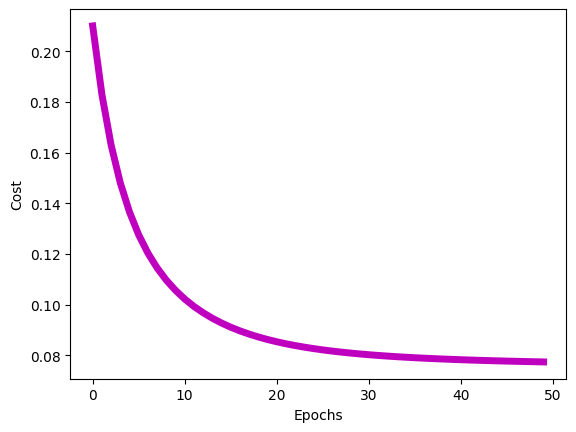

R-squared: 0.6471256964700391


In [ ]:
# Assuming you've loaded your training data into X_train and y_train

X_train_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
y_train_reshaped = y_train.reshape(-1, 1)
theta = np.zeros((X_train_with_bias.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(X_train_with_bias, y_train_reshaped, theta, learning_rate, num_epochs)
J = cost_function(X_train_with_bias, y_train_reshaped, theta)
print("Cost: ", J)
#print("Parameters: ", theta)

# For plotting cost
n_epochs = np.arange(num_epochs)
J_all = np.array(J_all).flatten()
plot_cost(J_all, n_epochs)

def r_squared(y_true, y_pred):
    # Calculate the mean of the observed y values
    y_mean = np.mean(y_true)

    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_true - y_mean) ** 2)

    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred) ** 2)

    # Calculate R-squared
    r_squared = 1 - (rss / tss)

    return r_squared

# Predicted values
y_pred = h(X_train_with_bias, theta)

# Calculate R-squared
r2 = r_squared(y_train_reshaped, y_pred)
print("R-squared:", r2)




**---------Testing----------**

Cost:  [[0.07097479]]


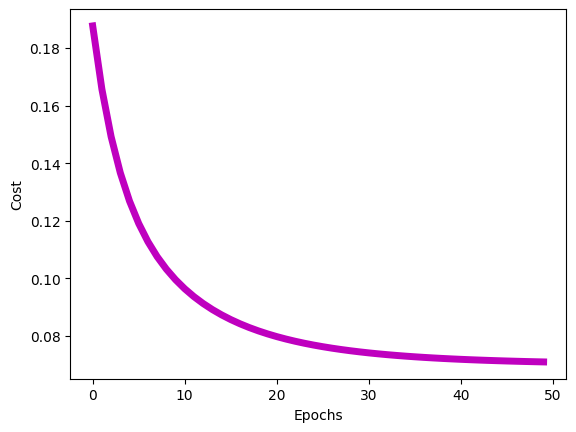

R-squared: 0.6297727414775384


In [ ]:
X_test_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_test_reshaped = y_test.reshape(-1, 1)
theta = np.zeros((X_test_with_bias .shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(X_test_with_bias , y_test_reshaped, theta, learning_rate, num_epochs)
J = cost_function(X_test_with_bias , y_test_reshaped, theta)
print("Cost: ", J)
#print("Parameters: ", theta)

# For plotting cost
n_epochs = np.arange(num_epochs)
J_all = np.array(J_all).flatten()
plot_cost(J_all, n_epochs)

def r_squared(y_true, y_pred):
    # Calculate the mean of the observed y values
    y_mean = np.mean(y_true)

    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_true - y_mean) ** 2)

    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred) ** 2)

    # Calculate R-squared
    r_squared = 1 - (rss / tss)

    return r_squared

# Predicted values
y_pred = h(X_test_with_bias, theta)

# Calculate R-squared
r2 = r_squared(y_test_reshaped, y_pred)
print("R-squared:", r2)



**----------Visualization----------**

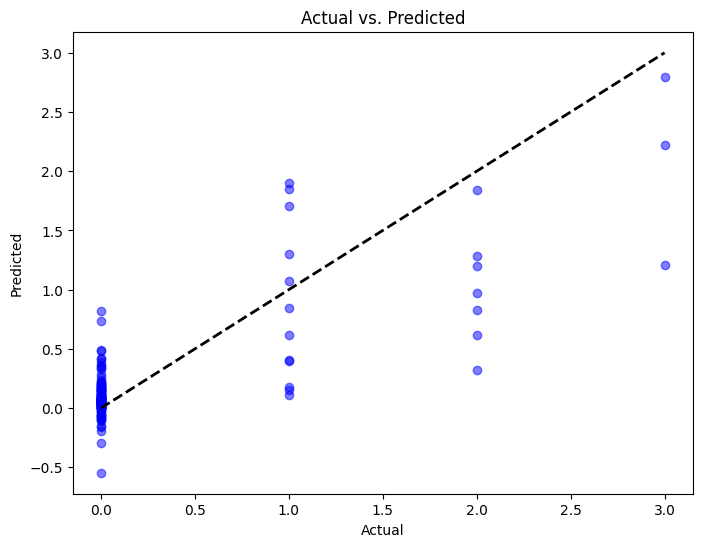

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

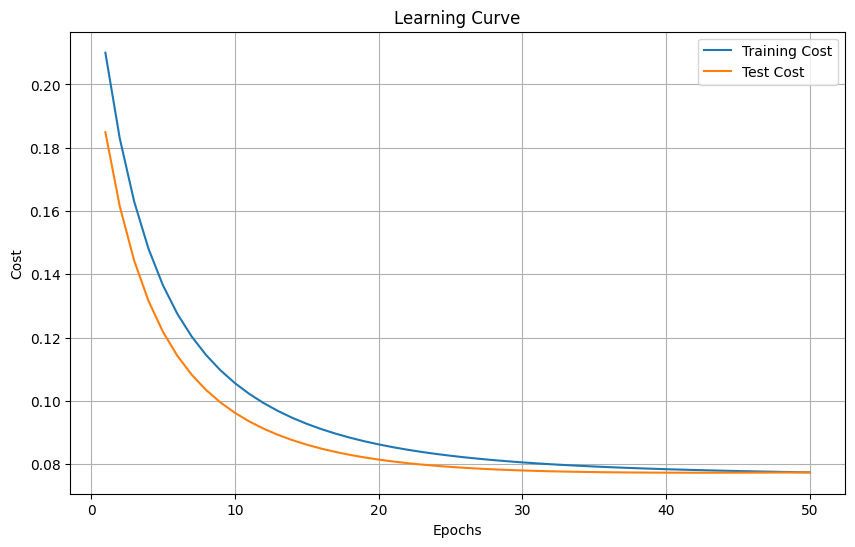

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def learning_curve(X_train, y_train, X_test, y_test, learning_rate, num_epochs):
    # Initialize theta
    theta = np.zeros((X_train.shape[1], 1))

    # Lists to store training and test costs
    train_costs = []
    test_costs = []

    for epoch in range(num_epochs):
        # Train the model
        theta, _ = gradient_descent(X_train, y_train, theta, learning_rate, 1)

        # Calculate training cost
        train_cost = cost_function(X_train, y_train, theta)
        train_costs.append(train_cost)

        # Calculate test cost
        test_cost = cost_function(X_test, y_test, theta)
        test_costs.append(test_cost)

  # Reshape the arrays to ensure compatibility for plotting
    # Reshape the arrays to ensure compatibility for plotting
    train_costs = np.array(train_costs).flatten()
    test_costs = np.array(test_costs).flatten()

# Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_costs, label='Training Cost')
    plt.plot(range(1, num_epochs + 1), test_costs, label='Test Cost')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()



    return train_costs, test_costs

# Assuming you have defined X_train, y_train, X_test, y_test, learning_rate, num_epochs
X_train_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
y_train_reshaped = y_train.reshape(-1, 1)
X_test_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_test_reshaped = y_test.reshape(-1, 1)

# Call learning_curve function to visualize the learning curve
train_costs, test_costs = learning_curve(X_train_with_bias, y_train_reshaped, X_test_with_bias, y_test_reshaped, learning_rate=0.1, num_epochs=50)
